#### Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot

# Set plot styles
sns.set(style = 'whitegrid')

#### Prepare the Data for Time Series Analysis

In [17]:
# Load the dataset
df = pd.read_csv('/Users/hpourmand/Desktop/All/calls.csv')

# Convert 'timeStamp' to datetime and set it as the index
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.set_index('timeStamp', inplace=True)

# Resample the data to daily frequency, counting the number of calls per day
df_daily = df.resample('D').size()

# Display the first few rows of the resampled data
print(df_daily.head())


timeStamp
2015-12-10    113
2015-12-11    377
2015-12-12    389
2015-12-13    298
2015-12-14    433
Freq: D, dtype: int64


#### Decompose the Time Series

<Figure size 1200x800 with 0 Axes>

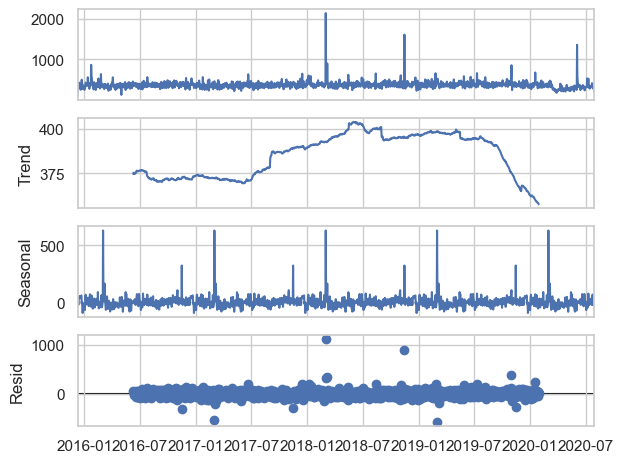

In [11]:
# Decompose the time series using seasonal_decompose
decomposition = seasonal_decompose(df_daily, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


#### Autocorrelation and Partial Autocorrelation

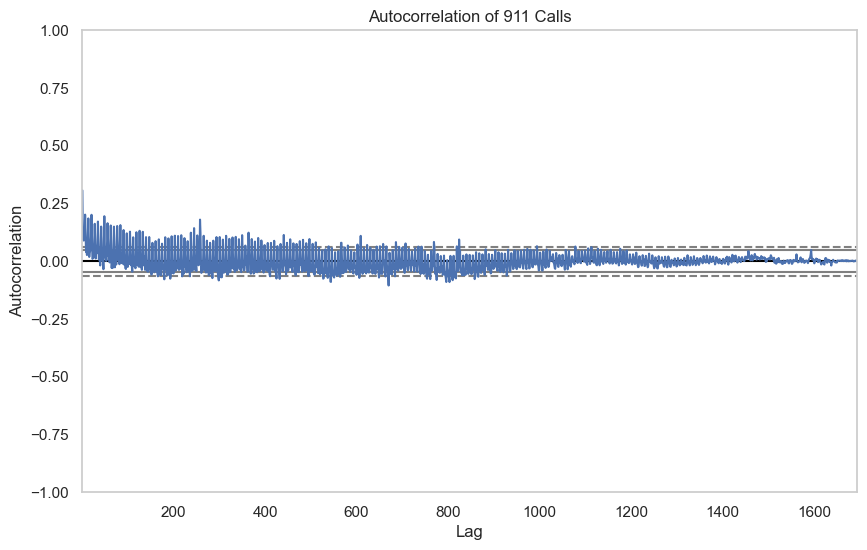

In [12]:
# Autocorrelation plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(df_daily)
plt.title('Autocorrelation of 911 Calls')
plt.show()

#### Fit an ARIMA Model

In [13]:
# Define the ARIMA model
model = ARIMA(df_daily, order = (5, 1, 0))  # (p, d, q)

# Fit the model
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1694
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9985.715
Date:                Thu, 22 Aug 2024   AIC                          19983.430
Time:                        17:43:35   BIC                          20016.035
Sample:                    12-10-2015   HQIC                         19995.503
                         - 07-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6048      0.013    -46.914      0.000      -0.630      -0.580
ar.L2         -0.5517      0.015    -36.621      0.000      -0.581      -0.522
ar.L3         -0.4088      0.016    -25.274      0.0

#### Forecasting with ARIMA

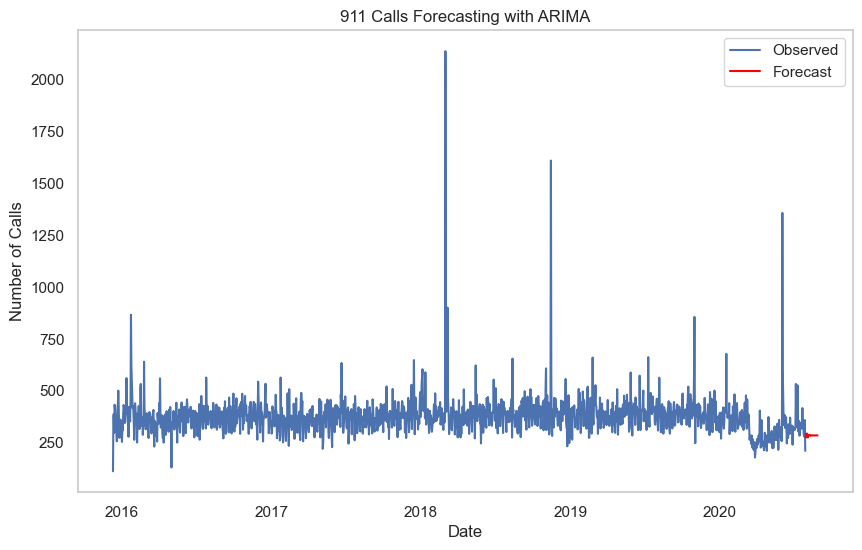

In [14]:
# Forecast for the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot the forecast
plt.figure(figsize = (10, 6))
plt.plot(df_daily.index, df_daily, label = 'Observed')
plt.plot(forecast.index, forecast, label = 'Forecast', color = 'red')
plt.title('911 Calls Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.grid(False)
plt.show()

#### Evaluate Model Performance

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate performance metrics for ARIMA
arima_mae = mean_absolute_error(df_daily[-30:], forecast)
arima_mse = mean_squared_error(df_daily[-30:], forecast)

print(f'ARIMA MAE: {arima_mae}, MSE: {arima_mse}')

ARIMA MAE: 59.60181017344624, MSE: 6732.954554976407
